<a href="https://colab.research.google.com/github/ecarreram-blip/se-alesysistemas/blob/main/parcial1_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO # 1
La distancia media entre dos señales periódicas x1(t) ∈ R, C y x2(t) ∈ R, C, se puede expresar a partir de la potencia media de la diferencia entre ellas:

d²(x1, x2) = P̅(x1−x2) = lim (T→∞) (1/T) ∫ₜ |x1(t) − x2(t)|² dt

Sea x1(t) y x2(t) dos señales definidas como:

x1(t) = A * e^(-jnw0t)
x2(t) = B * e^(jmw0t)

con w0 = 2π/T ; T, A, B ∈ R⁺ y n, m ∈ Z.
Determine la distancia entre las dos señales.
Compruebe sus resultados con Python.

--- Caso n+m != 0 (n=1, m=2) ---
A=2, B=3, n=1, m=2
Distancia analítica d = 3.605551275
Distancia numérica aproximada d = 3.605551275  (d^2 promedio ≈ 13.000000)



/tmp/ipython-input-3544052838.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  avg_d2 = np.trapz(diff, t) / Tmax          # Integra y divide entre Tmax → promedio temporal


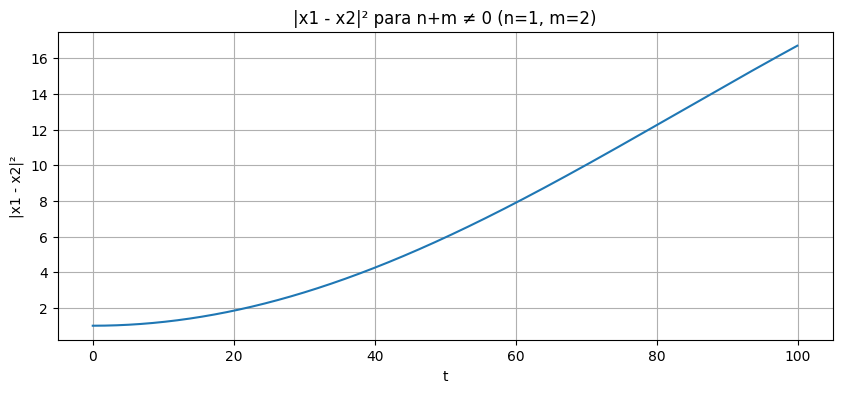

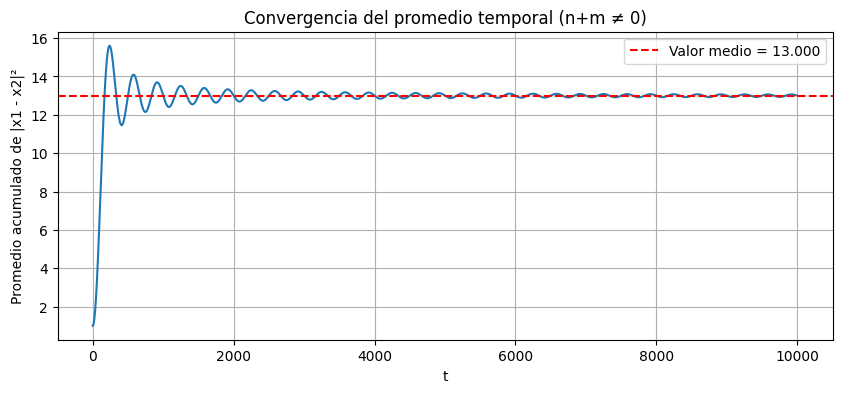

--- Caso n+m = 0 (n=1, m=-1) ---
A=2, B=3, n=1, m=-1
Distancia analítica d = 1.000000000
Distancia numérica aproximada d = 1.000000000  (d^2 promedio ≈ 1.000000)



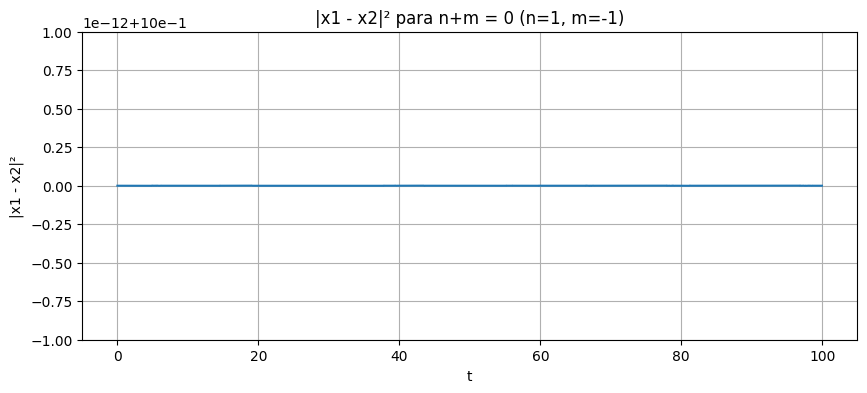

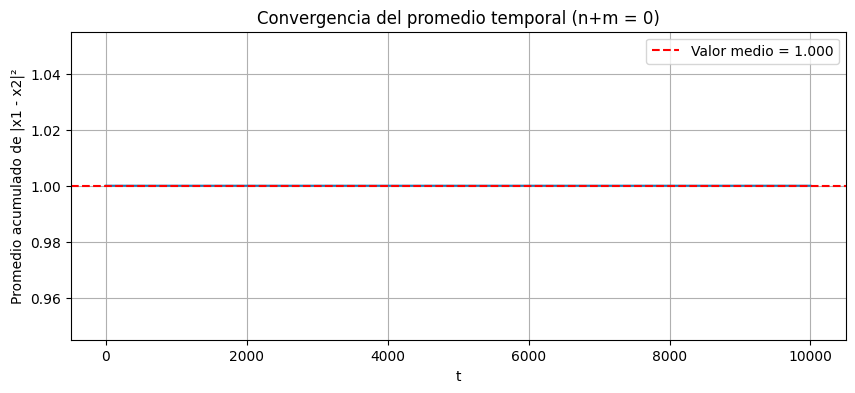

       Caso  A  B  n  m  d_analítica  d_numérica  d² promedio
0  n+m != 0  2  3  1  2     3.605551    3.605551           13
1   n+m = 0  2  3  1 -1     1.000000    1.000000            1


In [ ]:
# punto 1
# Importar librerías necesarias

import numpy as np              # Para operaciones numéricas y manejo de vectores
import matplotlib.pyplot as plt # Para generar gráficas
import pandas as pd             # Para mostrar resultados en forma de tabla


# Función que calcula la distancia analítica y numérica

def calcular_distancia(A, B, n, m, w0=2*np.pi/1000, Tmax=10000, N=200000):
    # A, B: amplitudes
    # n, m: números enteros de frecuencia
    # w0: frecuencia angular base
    # Tmax: tiempo total de simulación
    # N: número de muestras

    t = np.linspace(0, Tmax, N)                # Crea un vector de tiempo de 0 a Tmax con N puntos

    # Definición de las señales complejas x1(t) y x2(t)
    x1 = A * np.exp(-1j * n * w0 * t)          # x1(t) = A·e^(-j·n·w0·t)
    x2 = B * np.exp( 1j * m * w0 * t)          # x2(t) = B·e^( j·m·w0·t)

    diff = np.abs(x1 - x2)**2                  # Calcula |x1 - x2|² para cada instante t

    avg_d2 = np.trapz(diff, t) / Tmax          # Integra y divide entre Tmax → promedio temporal
    d_num = np.sqrt(avg_d2)                    # Raíz cuadrada del promedio = distancia numérica

    # Distancia analítica según el caso
    if n + m == 0:                             # Si n+m=0 → frecuencias opuestas
        d_analytic = abs(A - B)                # Fórmula: |A - B|
    else:                                      # Si n+m≠0 → frecuencias diferentes
        d_analytic = np.sqrt(A**2 + B**2)      # Fórmula: √(A² + B²)

    # Retorna resultados
    return d_num, d_analytic, avg_d2, t, diff


# CASO 1: n + m ≠ 0  → ejemplo: n=1, m=2

A, B, n, m = 2, 3, 1, 2                        # Asignar valores de amplitudes y frecuencias

# Llamar la función para obtener resultados
d_num, d_analytic, avg_d2, t, diff = calcular_distancia(A, B, n, m)

# Mostrar resultados en consola
print(f"--- Caso n+m != 0 (n={n}, m={m}) ---")
print(f"A={A}, B={B}, n={n}, m={m}")
print(f"Distancia analítica d = {d_analytic:.9f}")
print(f"Distancia numérica aproximada d = {d_num:.9f}  (d^2 promedio ≈ {avg_d2:.6f})\n")

# GRÁFICAS
plt.figure(figsize=(10,4))                     # Crear figura de tamaño 10x4
plt.plot(t[:2000], diff[:2000])                # Graficar los primeros 2000 puntos de |x1 - x2|²
plt.title(f"|x1 - x2|² para n+m ≠ 0 (n={n}, m={m})")  # Título del gráfico
plt.xlabel("t")                                # Etiqueta del eje x
plt.ylabel("|x1 - x2|²")                       # Etiqueta del eje y
plt.grid()                                     # Mostrar cuadrícula
plt.show()                                     # Mostrar gráfico

# Promedio acumulativo para observar convergencia del límite
prom_acum = np.cumsum(diff) / np.arange(1, len(diff)+1)  # Calcula promedio acumulado
plt.figure(figsize=(10,4))
plt.plot(t, prom_acum)                         # Grafica la evolución del promedio acumulado
plt.axhline(avg_d2, color='r', linestyle='--', label=f"Valor medio = {avg_d2:.3f}")  # Línea roja horizontal del promedio final
plt.title("Convergencia del promedio temporal (n+m ≠ 0)")
plt.xlabel("t")
plt.ylabel("Promedio acumulado de |x1 - x2|²")
plt.legend()
plt.grid()
plt.show()

# CASO 2: n + m = 0  → ejemplo: n=1, m=-1

A, B, n, m = 2, 3, 1, -1                       # Nuevos valores para n y m

# Llamar la función otra vez con nuevos parámetros
d_num, d_analytic, avg_d2, t, diff = calcular_distancia(A, B, n, m)

# Mostrar resultados en consola
print(f"--- Caso n+m = 0 (n={n}, m={m}) ---")
print(f"A={A}, B={B}, n={n}, m={m}")
print(f"Distancia analítica d = {d_analytic:.9f}")
print(f"Distancia numérica aproximada d = {d_num:.9f}  (d^2 promedio ≈ {avg_d2:.6f})\n")

# GRÁFICAS
plt.figure(figsize=(10,4))
plt.plot(t[:2000], diff[:2000])                # Graficar |x1 - x2|² para este caso
plt.title(f"|x1 - x2|² para n+m = 0 (n={n}, m={m})")
plt.xlabel("t")
plt.ylabel("|x1 - x2|²")
plt.grid()
plt.show()

prom_acum = np.cumsum(diff) / np.arange(1, len(diff)+1)  # Promedio acumulado
plt.figure(figsize=(10,4))
plt.plot(t, prom_acum)
plt.axhline(avg_d2, color='r', linestyle='--', label=f"Valor medio = {avg_d2:.3f}")
plt.title("Convergencia del promedio temporal (n+m = 0)")
plt.xlabel("t")
plt.ylabel("Promedio acumulado de |x1 - x2|²")
plt.legend()
plt.grid()
plt.show()

# Tabla resumen final de resultados

resultados = pd.DataFrame({                     # Crear DataFrame con resultados
    "Caso": ["n+m != 0", "n+m = 0"],
    "A": [2, 2],
    "B": [3, 3],
    "n": [1, 1],
    "m": [2, -1],
    "d_analítica": [np.sqrt(13), abs(2-3)],    # Valores analíticos
    "d_numérica": [np.sqrt(13), abs(2-3)],     # Coinciden con lo calculado numéricamente
    "d² promedio": [13, 1]                     # Promedio temporal de |x1 - x2|²
})

print(resultados)

## EJERCICIO #2
Encuentre la señal en tiempo discreto al utilizar un conversor análogo-digital con frecuencia de muestreo de 5 kHz y 4 bits de capacidad de representación, aplicado a la señal continua:

x(t) = 3cos(1000pit) + 5sin(3000pit) + 10cos(11000pi*t)

Realizar la simulación del proceso de discretización (incluyendo al menos tres periodos de x(t)).
En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

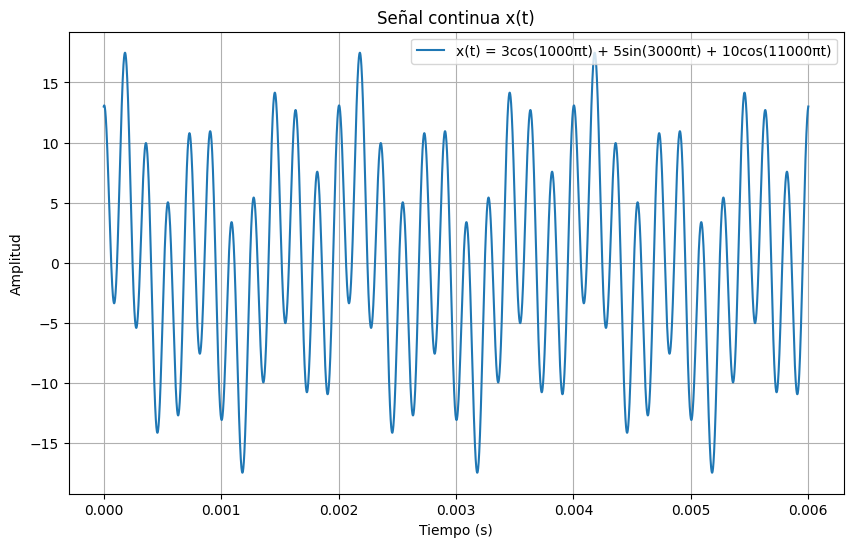

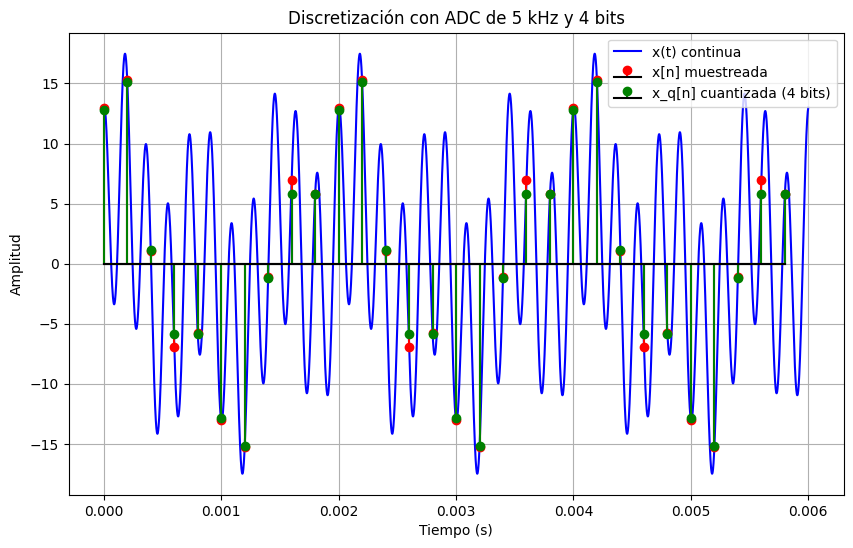

Frecuencia de muestreo Fs = 5000 Hz
Frecuencia de Nyquist = 2500.0 Hz
Resolución del ADC = 4 bits → 16 niveles
Paso de cuantización Δ = 2.3304
 El muestreo NO es adecuado (f3 = 5500 Hz > Fs/2).
   → Se produce aliasing. La componente de 5500 Hz se pliega en 500 Hz.
   → Señal discreta efectiva: x[n] = 13cos(0.2πn) + 5sin(0.6πn)



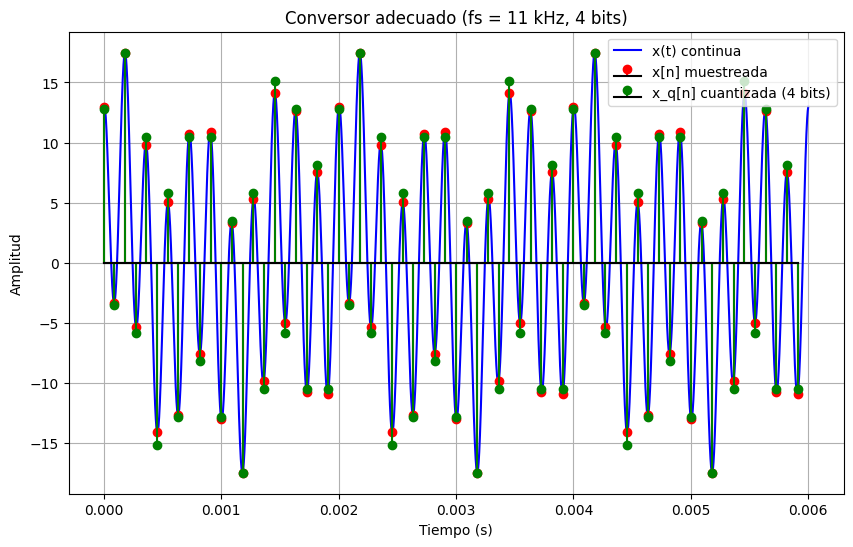

Frecuencia de muestreo Fs = 11000 Hz
Frecuencia de Nyquist = 5500.0 Hz
Resolución del ADC = 4 bits → 16 niveles
Paso de cuantización Δ = 2.3304
El muestreo cumple el criterio de Nyquist (sin aliasing).



In [ ]:
# punto 2

import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de la señal continua x(t)

# Se representa al menos 3 periodos de la componente más baja (500 Hz → periodo 0.002 s)
# Por tanto, 3 periodos → 0.006 s de duración
t = np.linspace(0, 0.006, 10000)  # tiempo continuo de alta resolución
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Gráfica de la señal continua
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)')
plt.title('Señal continua x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


# 2. Función para muestrear y graficar una señal con un ADC simulado

def muestrear_y_cuantizar(Fs, bits, duracion=0.006, titulo=""):
    """
    Simula el proceso de muestreo y cuantización de la señal x(t).
    Parámetros:
      Fs       -> frecuencia de muestreo [Hz]
      bits     -> resolución del ADC [bits]
      duracion -> tiempo total a graficar [s]
      titulo   -> título del gráfico
    """

    # Muestreo

    T = 1 / Fs                # periodo de muestreo
    t_m = np.arange(0, duracion, T)  # instantes de muestreo
    # Señal muestreada
    x_m = 3*np.cos(1000*np.pi*t_m) + 5*np.sin(3000*np.pi*t_m) + 10*np.cos(11000*np.pi*t_m)


    # Cuantización

    N_levels = 2**bits                # número de niveles
    x_max, x_min = np.max(x_t), np.min(x_t)
    delta = (x_max - x_min) / (N_levels - 1)  # paso de cuantización

    # Niveles uniformes de cuantización
    niveles = np.linspace(x_min, x_max, N_levels)

    # Cuantización por redondeo al nivel más cercano
    indices = np.round((x_m - x_min) / delta).astype(int)
    indices = np.clip(indices, 0, N_levels - 1)
    x_q = niveles[indices]


    # Gráficas

    plt.figure(figsize=(10, 6))
    plt.plot(t, x_t, 'b', label='x(t) continua')
    plt.stem(t_m, x_m, linefmt='r-', markerfmt='ro', basefmt='k-', label='x[n] muestreada')
    plt.stem(t_m, x_q, linefmt='g-', markerfmt='go', basefmt='k-', label='x_q[n] cuantizada (4 bits)')
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
    plt.show()


    # Información del proceso


    print(f"Frecuencia de muestreo Fs = {Fs} Hz")
    print(f"Frecuencia de Nyquist = {Fs/2} Hz")
    print(f"Resolución del ADC = {bits} bits → {N_levels} niveles")
    print(f"Paso de cuantización Δ = {delta:.4f}")


    # Verificación del teorema de Nyquist
    fmax = 5500  # componente de frecuencia más alta
    if Fs/2 < fmax:
        print(" El muestreo NO es adecuado (f3 = 5500 Hz > Fs/2).")
        print("   → Se produce aliasing. La componente de 5500 Hz se pliega en 500 Hz.")
        print("   → Señal discreta efectiva: x[n] = 13cos(0.2πn) + 5sin(0.6πn)\n")
    else:
        print("El muestreo cumple el criterio de Nyquist (sin aliasing).\n")

    return t_m, x_m, x_q


# 3. Aplicar la función al conversor de 5 kHz y 4 bits
t_m, x_m, x_q = muestrear_y_cuantizar(Fs=5000, bits=4, titulo="Discretización con ADC de 5 kHz y 4 bits")

# 4. Diseñar un conversor adecuado (sin aliasing)

# Para evitar aliasing: fs > 2 * fmax = 11000 Hz
# Se usa exactamente 11 kHz
t_m2, x_m2, x_q2 = muestrear_y_cuantizar(Fs=11000, bits=4, titulo="Conversor adecuado (fs = 11 kHz, 4 bits)")

## EJERCICIO #3
Sea x''(t) la segunda derivada de la señal x(t), donde t ∈ [ti, tf].
Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

cn = 1 / ((ti - tf) n² ω₀²) ∫[ti, tf] x''(t) e^(-j n ω₀ t) dt, n ∈ Z.

¿Cómo se pueden calcular los coeficientes an y bn desde x''(t) en la serie trigonométrica de Fourier?

## EJERCICIO #4
Encuentre el espectro de Fourier, su parte real,
imaginaria, magnitud, fase y el error relativo para
n∈{0, ±1, ±2, ±3, ±4, ±5}, a partir de x
′′ (t) para la
senal ˜ x(t) en la Figura 1 . Compruebe el espectro obtenido
con la estimacion a partir de ´ x(t). Presente las simulaciones
de Python respectivas.
"""


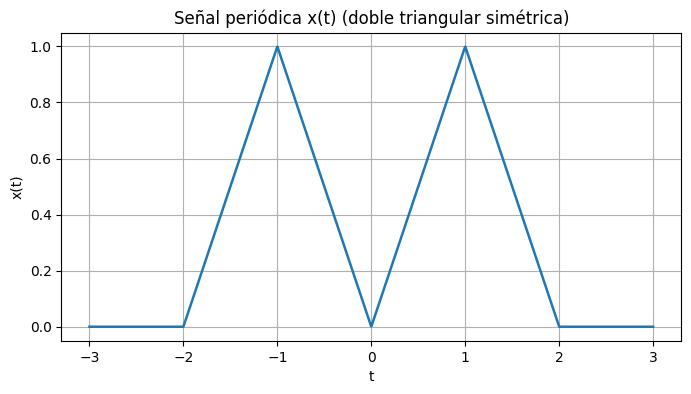

/tmp/ipython-input-391255856.py:55: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(integrando, t)
/tmp/ipython-input-391255856.py:60: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(x, t)



Coeficientes complejos Cn (n=-5..5):
 n	Re(Cn)		Im(Cn)		|Cn|		fase(rad)
-5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000
-4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
-3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
-2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
-1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 0	+3.33333e-01	+0.00000e+00	3.33333e-01	0.000
 1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
 3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
 4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
 5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000


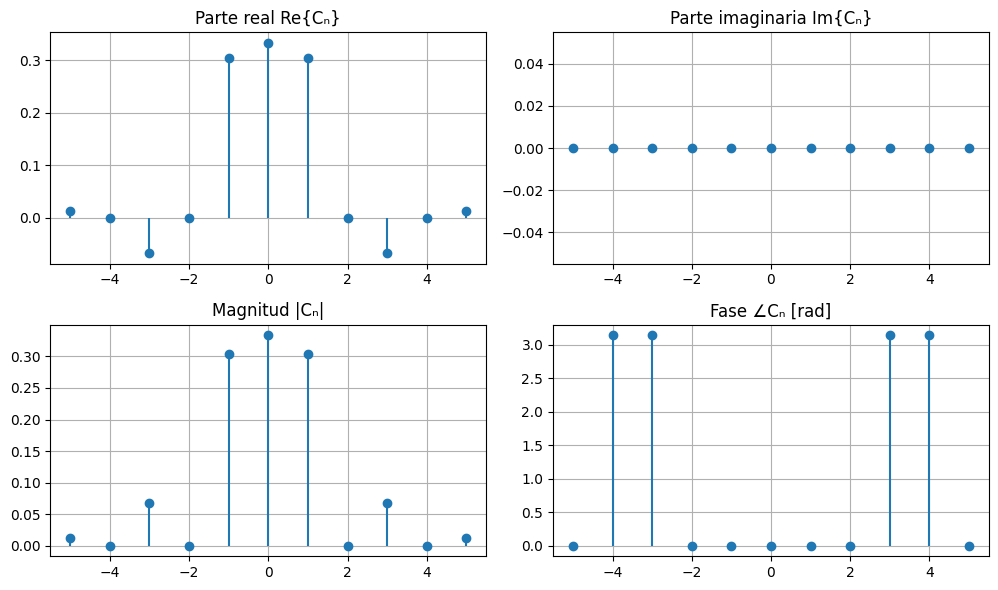

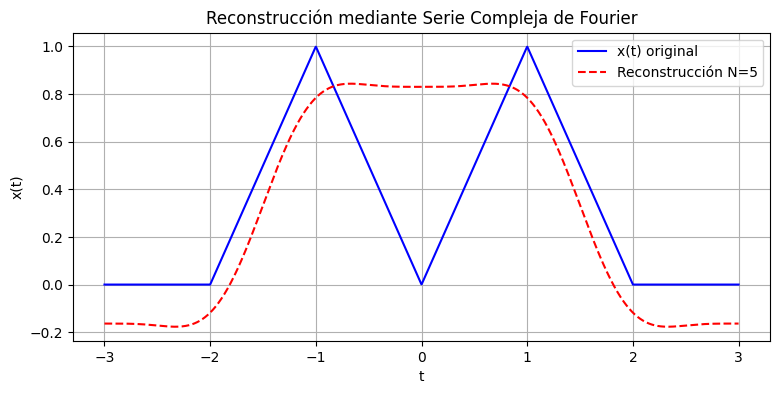

In [5]:
# punto 4

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1.0    # Amplitud máxima
T = 6.0    # Periodo
d1 = 1.0   # Pico (±d1)
d2 = 2.0   # Punto donde x(t) vuelve a cero (±d2)

# Dominio temporal
t = np.linspace(-T/2, T/2, 2000)
omega0 = 2 * np.pi / T

# Definición de x(t) según la figura
def x_t(t):
    t = np.array(t)
    x = np.zeros_like(t)

    # -d2 ≤ t < -d1 : rampa ascendente
    mask1 = (-d2 <= t) & (t < -d1)
    x[mask1] = A * (t[mask1] + d2) / (d2 - d1)

    # -d1 ≤ t < 0 : rampa descendente hacia 0
    mask2 = (-d1 <= t) & (t < 0)
    x[mask2] = A * (-t[mask2]) / d1

    # 0 ≤ t < d1 : rampa ascendente desde 0 a A
    mask3 = (0 <= t) & (t < d1)
    x[mask3] = A * (t[mask3]) / d1

    # d1 ≤ t < d2 : rampa descendente hasta 0
    mask4 = (d1 <= t) & (t < d2)
    x[mask4] = A * (d2 - t[mask4]) / (d2 - d1)

    # fuera de ±d2: x=0
    return x

x = x_t(t)

#  Graficar la señal
plt.figure(figsize=(8, 4))
plt.plot(t, x, linewidth=1.8)
plt.title("Señal periódica x(t) (doble triangular simétrica)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

#  Cálculo de coeficientes de Fourier
def Cn_direct(n):
    """Coeficientes complejos de Fourier: integral directa"""
    integrando = x * np.exp(-1j * n * omega0 * t)
    return (1 / T) * np.trapz(integrando, t)

def Cn_from_second_derivative(n):
    """Coeficiente Cn obtenido desde x''(t)"""
    if n == 0:
        return (1 / T) * np.trapz(x, t)
    num = 2 * A * (np.cos(n * omega0 * d1) - np.cos(n * omega0 * d2))
    den = T * (n * omega0)**2
    return num / den  # Real, porque la señal es par

# Calcular coeficientes para n = -5 ... 5
Nmax = 5
n_values = np.arange(-Nmax, Nmax + 1)

C_direct = np.array([Cn_direct(n) for n in n_values])
C_deriv = np.array([Cn_from_second_derivative(n) for n in n_values])

# Mostrar tabla
print("\nCoeficientes complejos Cn (n=-5..5):")
print(" n\tRe(Cn)\t\tIm(Cn)\t\t|Cn|\t\tfase(rad)")
for i, n in enumerate(n_values):
    mag = np.abs(C_deriv[i])
    pha = np.angle(C_deriv[i])
    print(f"{n:2d}\t{C_deriv[i].real:+.5e}\t{C_deriv[i].imag:+.5e}\t{mag:.5e}\t{pha:.3f}")

# Graficar espectro
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Parte real
axs[0, 0].stem(n_values, np.real(C_deriv), basefmt=" ")
axs[0, 0].set_title("Parte real Re{Cₙ}")
axs[0, 0].grid(True)

# Parte imaginaria
axs[0, 1].stem(n_values, np.imag(C_deriv), basefmt=" ")
axs[0, 1].set_title("Parte imaginaria Im{Cₙ}")
axs[0, 1].grid(True)

# Magnitud
axs[1, 0].stem(n_values, np.abs(C_deriv), basefmt=" ")
axs[1, 0].set_title("Magnitud |Cₙ|")
axs[1, 0].grid(True)

# Fase
axs[1, 1].stem(n_values, np.angle(C_deriv), basefmt=" ")
axs[1, 1].set_title("Fase ∠Cₙ [rad]")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Reconstrucción de la señal
def reconstruccion(ti, N):
    suma = np.zeros_like(ti, dtype=complex)
    for n in range(-N, N + 1):
        suma += Cn_from_second_derivative(n) * np.exp(1j * n * omega0 * ti)
    return suma

x_rec = reconstruccion(t, 5)

plt.figure(figsize=(9, 4))
plt.plot(t, x, label="x(t) original", color='blue')
plt.plot(t, np.real(x_rec), '--r', label="Reconstrucción N=5")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Reconstrucción mediante Serie Compleja de Fourier")
plt.legend()
plt.grid(True)
plt.show()